Iteration 10, Training MSE: 2968.5600
Iteration 20, Training MSE: 2182.6537
Iteration 30, Training MSE: 1832.2202
Iteration 40, Training MSE: 1600.0162
Iteration 50, Training MSE: 1439.6818
Iteration 60, Training MSE: 1323.2449
Iteration 70, Training MSE: 1226.8484
Iteration 80, Training MSE: 1123.3223
Iteration 90, Training MSE: 1056.8877
Iteration 100, Training MSE: 997.1211
Test MSE: 2898.4367


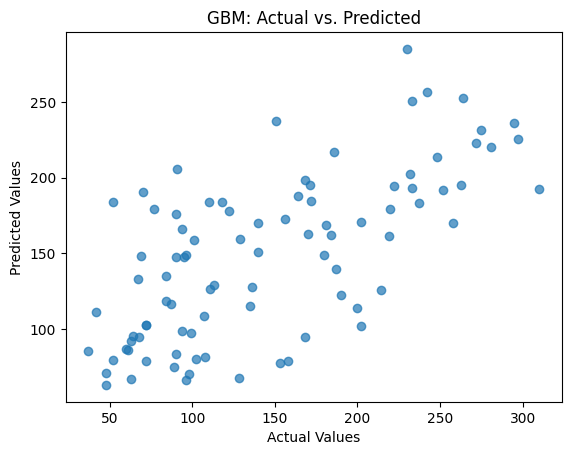

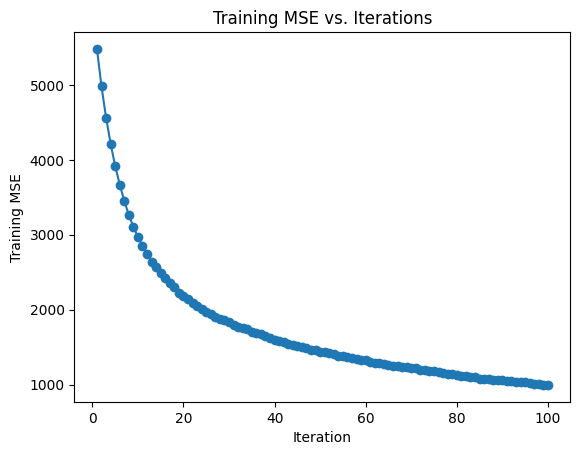

In [2]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

np.random.seed(42)

from sklearn.datasets import load_diabetes
data = load_diabetes()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

n_estimators = 100
learning_rate = 0.1
max_depth = 3

y_pred = np.full_like(y_train, y_train.mean(), dtype=np.float64)

def compute_residuals(y_true, y_pred):
    return y_true - y_pred

def build_tree(X, residuals, max_depth):
    from sklearn.tree import DecisionTreeRegressor
    tree = DecisionTreeRegressor(max_depth=max_depth)
    tree.fit(X, residuals)
    return tree

trees = []
learning_rates = []

for i in range(n_estimators):
    residuals = compute_residuals(y_train, y_pred)

    tree = build_tree(X_train, residuals, max_depth)
    trees.append(tree)

    tree_pred = tree.predict(X_train)

    y_pred += learning_rate * tree_pred

    if (i + 1) % 10 == 0:
        mse = mean_squared_error(y_train, y_pred)
        print(f"Iteration {i + 1}, Training MSE: {mse:.4f}")

y_test_pred = np.full_like(y_test, y_train.mean(), dtype=np.float64)
for tree in trees:
    y_test_pred += learning_rate * tree.predict(X_test)

test_mse = mean_squared_error(y_test, y_test_pred)
print(f"Test MSE: {test_mse:.4f}")

plt.scatter(y_test, y_test_pred, alpha=0.7)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("GBM: Actual vs. Predicted")
plt.show()

train_mse_history = []
y_pred_history = np.full_like(y_train, y_train.mean(), dtype=np.float64)

for i, tree in enumerate(trees):
    y_pred_history += learning_rate * tree.predict(X_train)
    mse = mean_squared_error(y_train, y_pred_history)
    train_mse_history.append(mse)

plt.plot(range(1, n_estimators + 1), train_mse_history, marker='o')
plt.xlabel("Iteration")
plt.ylabel("Training MSE")
plt.title("Training MSE vs. Iterations")
plt.show()
